In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,8

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Velocity\Projects\Time_Series_project\monthly-beer-production-in-austr.csv')
df.head(60)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [3]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
# Parsing String to Datetime
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB


In [6]:
# Quarterly_data= df.resample('Q',label='right', closed='left',on='Month').sum()
# Quarterly_data

In [6]:
df = df.set_index('Month')
df.columns=['Monthly_beer_production']
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


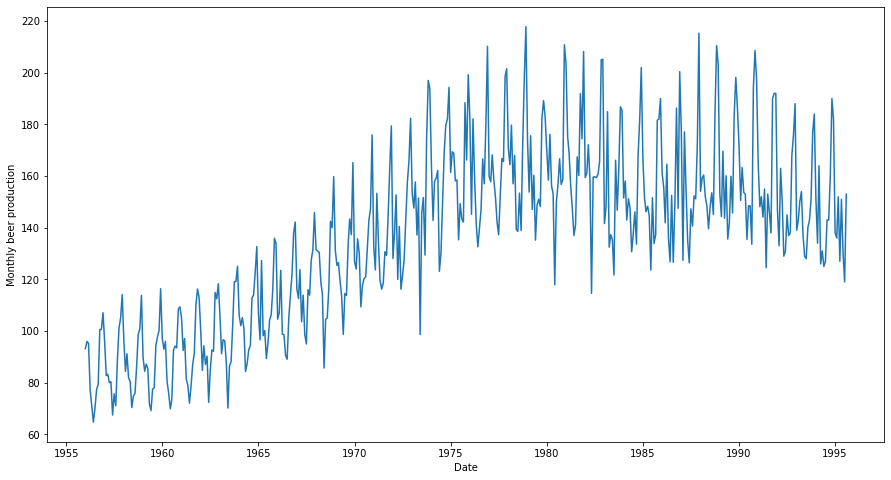

In [7]:
plt.xlabel('Date')
plt.ylabel('Monthly beer production')
plt.plot(df,scalex=True, scaley=True)

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

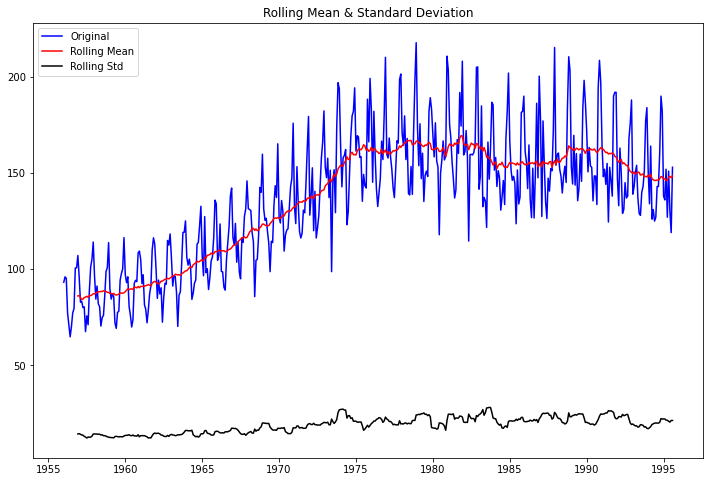

Results of Dickey-Fuller Test:
p-value = 0.2842. The series is likely non-stationary.
Test Statistic                  -2.005361
p-value                          0.284227
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [10]:
test_stationarity(df)

In [11]:
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller
# x = df['Monthly_beer_production'].values
# result=adfuller(x)
# print('ADF Statistic: %f' % result[0])
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.282661
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [12]:
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


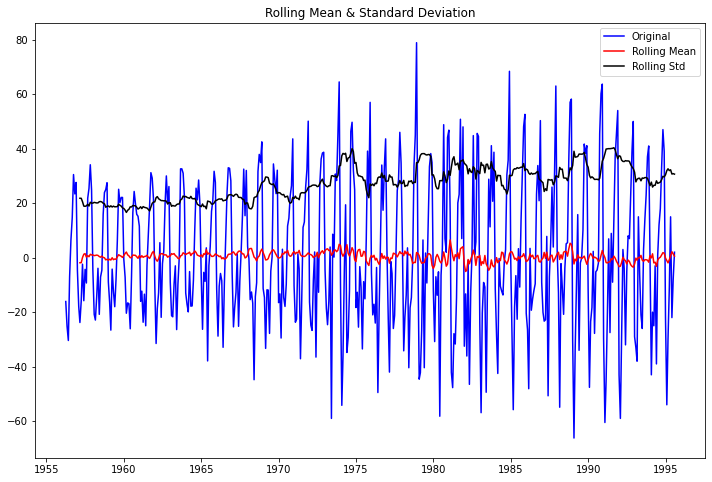

Results of Dickey-Fuller Test:
p-value = 0.0086. The series is likely stationary.
Test Statistic                  -3.476111
p-value                          0.008622
#Lags Used                      20.000000
Number of Observations Used    452.000000
Critical Value (1%)             -3.444900
Critical Value (5%)             -2.867956
Critical Value (10%)            -2.570187
dtype: float64


In [13]:
df['Beer_prod_difference']=df['Monthly_beer_production']- df['Monthly_beer_production'].shift(3)

test_stationarity(df['Beer_prod_difference'].dropna())

In [15]:
df

,Monthly_beer_production,Beer_prod_difference
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,NaN
1956-03-01,95.2,NaN
1956-04-01,77.1,-16.1
1956-05-01,70.9,-25.1
...,...,...
1995-04-01,127.0,-11.0
1995-05-01,151.0,15.0
1995-06-01,130.0,-22.0


In [16]:
new_df=df.copy()
new_df.dropna(inplace=True)

In [17]:
new_df

,Monthly_beer_production,Beer_prod_difference
Month,,
1956-04-01,77.1,-16.1
1956-05-01,70.9,-25.1
1956-06-01,64.8,-30.4
1956-07-01,70.1,-7.0
1956-08-01,77.3,6.4
...,...,...
1995-04-01,127.0,-11.0
1995-05-01,151.0,15.0
1995-06-01,130.0,-22.0


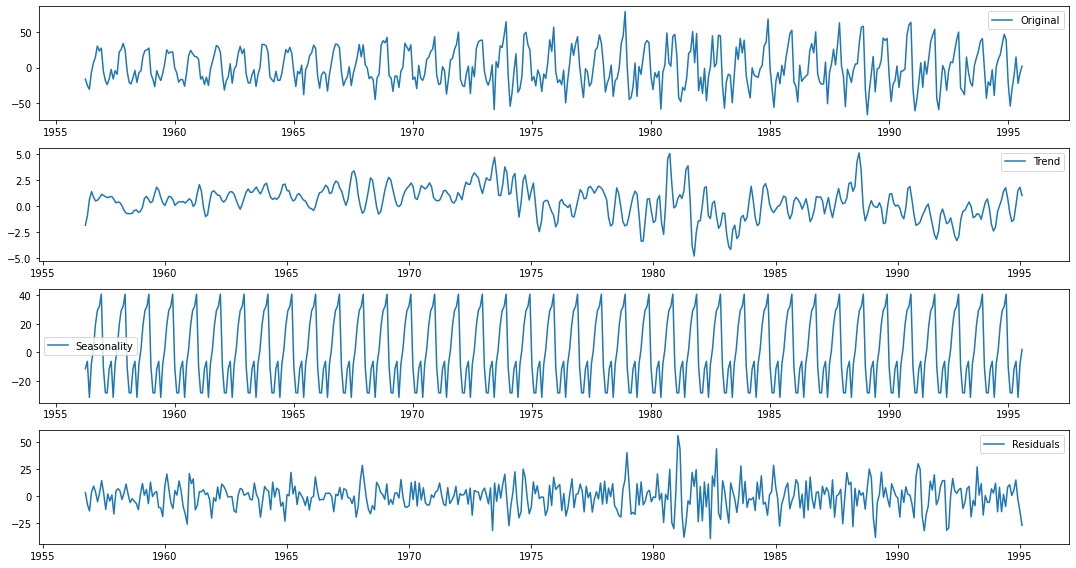

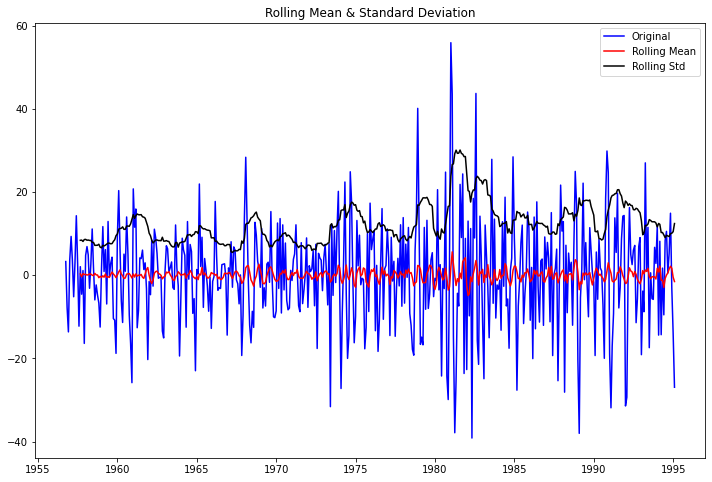

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.164001e+01
p-value                        2.158316e-21
#Lags Used                     1.800000e+01
Number of Observations Used    4.420000e+02
Critical Value (1%)           -3.445232e+00
Critical Value (5%)           -2.868101e+00
Critical Value (10%)          -2.570265e+00
dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_df['Beer_prod_difference'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_df['Beer_prod_difference'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)


C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


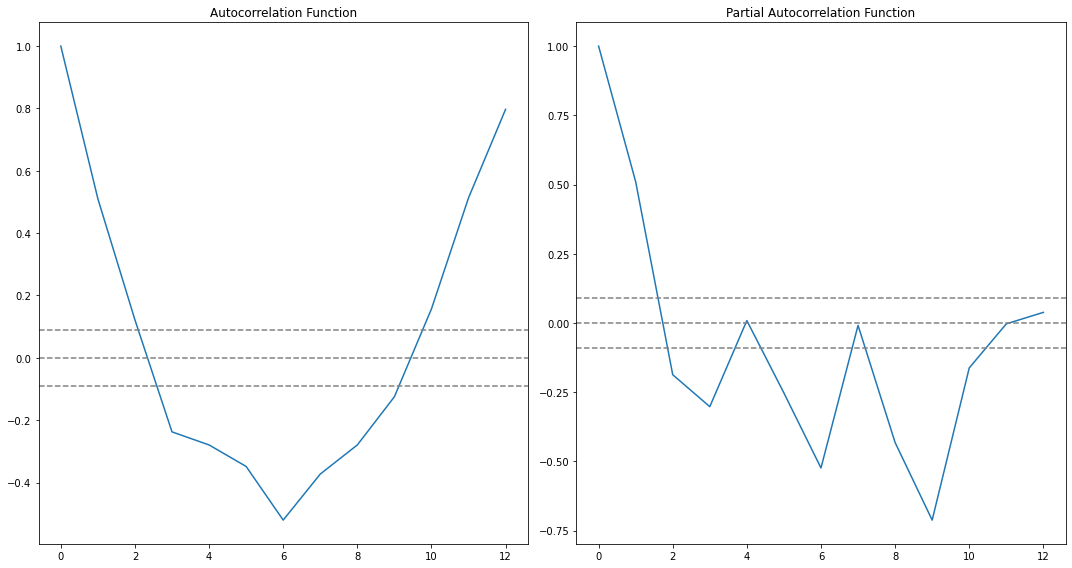

In [18]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(new_df['Beer_prod_difference'], nlags=12)
lag_pacf = pacf(new_df['Beer_prod_difference'], nlags=12, method='ols')

#Plot ACF: 
plt.subplot(121)
plt.plot(lag_acf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

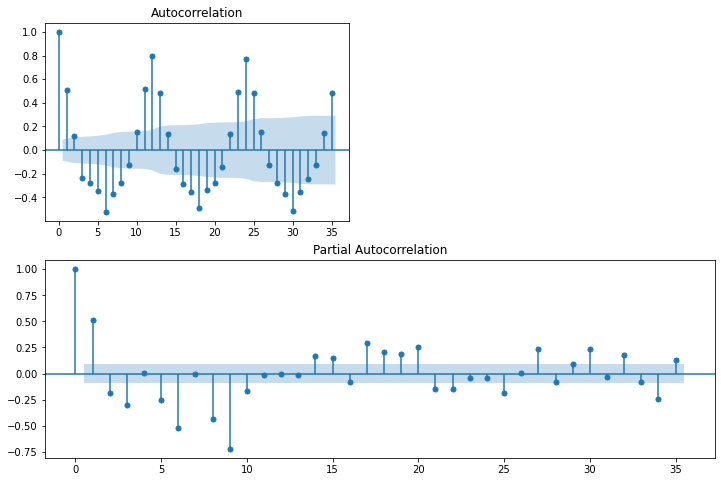

In [19]:
# p=2,d=0,q=1
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(new_df['Beer_prod_difference'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['Beer_prod_difference'],lags=35,ax=ax2)

In [ ]:
# # grid search ARIMA parameters for time series
# import warnings
# from math import sqrt
# from pandas import read_csv
# from pandas import datetime
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     train_size = int(len(X) * 0.66)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     rmse = sqrt(mean_squared_error(test, predictions))
#     return rmse
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     rmse = evaluate_arima_model(dataset, order)
#                     if rmse < best_score:
#                         best_score, best_cfg = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order,rmse))
#                 except:
#                     continue
#     print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
# # series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series= new_df['Beer_prod_difference']
# # evaluate parameters
# p_values = range(1,3)
# d_values = range(0, 3)
# q_values = range(2, 4)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

<ipython-input-20-250231fbc20c>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ARIMA(1, 0, 2) RMSE=23.023


In [32]:
y_train=df['Monthly_beer_production'][:380]
y_test=df['Monthly_beer_production'][380:]
y_train

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
              ...  
1987-04-01    154.4
1987-05-01    135.2
1987-06-01    126.4
1987-07-01    147.3
1987-08-01    140.6
Name: Monthly_beer_production, Length: 380, dtype: float64

# ARIMA Model

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Plotting AR Model


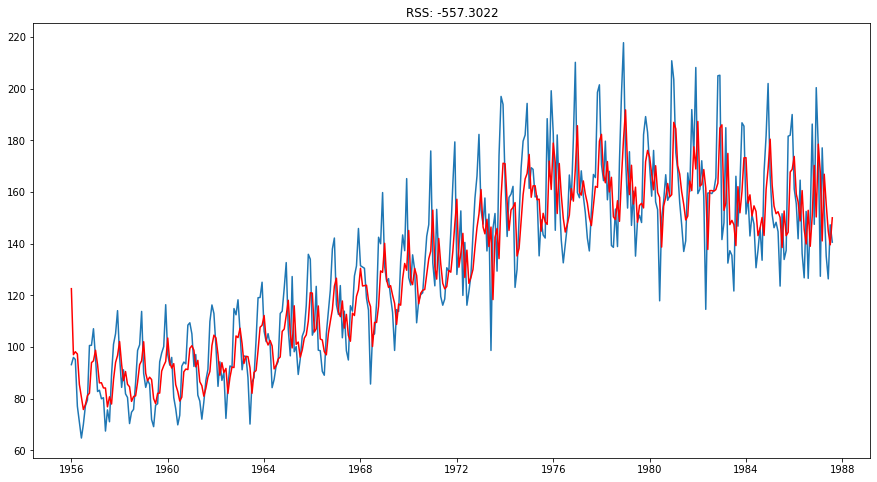

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y_train, order=(2,0,2))
results_ar =model.fit()
plt.plot(y_train)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ar.fittedvalues - y_train)))
print('Plotting AR Model')

In [34]:
model = ARIMA(y_train,order=(2,0,2))
results_ar = model.fit()

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<AxesSubplot:xlabel='Month'>

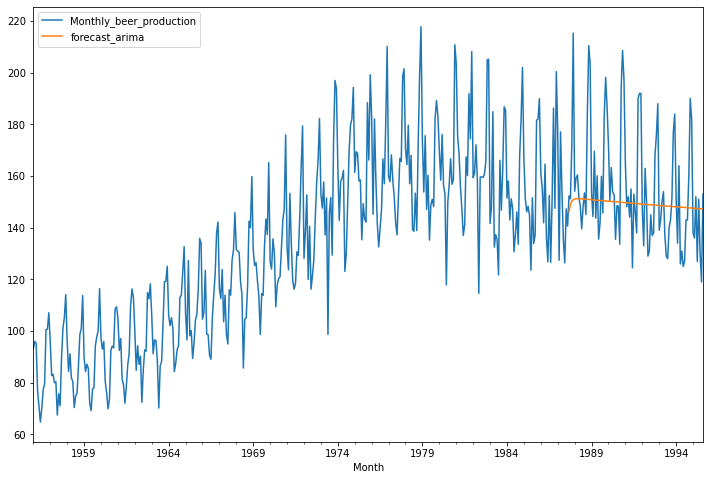

In [35]:
df['forecast_arima']=results_ar.predict(start=380,end=476,dynamic=True)
df[['Monthly_beer_production','forecast_arima']].plot(figsize=(12,8))

In [36]:
y_pred_ar=df['forecast_arima'][380:]

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,25)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataframe_monthly = pd.concat([df,future_dates_df])

In [38]:
future_dataframe_monthly

,Monthly_beer_production,Beer_prod_difference,forecast_arima
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,-16.1,NaN
1956-05-01,70.9,-25.1,NaN
...,...,...,...
1997-04-01,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN


In [39]:
# date_rng = pd.date_range(start='2021-07-31', end='2022-06-30', freq='M')
# date_rng

In [40]:
# future_dates_df = pd.DataFrame(date_rng, columns=['adoptionDate'])
# future_dates_df['adoptionDate'] = pd.to_datetime(future_dates_df['adoptionDate'])
# future_dates_df = future_dates_df.set_index('adoptionDate')
# future_dataframe_monthly = pd.concat([monthly_dataset,future_dates_df])
# future_dataframe_monthly.tail(20)

In [42]:
future_dataframe_monthly

,Monthly_beer_production,Beer_prod_difference,forecast_arima
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,-16.1,NaN
1956-05-01,70.9,-25.1,NaN
...,...,...,...
1997-04-01,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN


In [43]:
# future_dataframe_monthly['forecast_arima']=results_ar.predict(start=476,end=500,dynamic=True)
# future_dataframe_monthly[['Monthly_beer_production','forecast_arima']].plot(figsize=(12,8))

In [61]:
results_ar.forecast(13)

(array([150.88337746, 148.47208819, 147.44022438, 146.98593772,
        146.77350799, 146.66237484, 146.59368799, 146.54280779,
        146.49941798, 146.45919926, 146.42034317, 146.38209247,
        146.34413007]),
 array([17.29569032, 19.73155047, 20.34457846, 20.57253126, 20.69585091,
        20.78474179, 20.86066162, 20.9312105 , 20.99932433, 21.06618835,
        21.13229196, 21.19784043, 21.26292167]),
 array([[116.98444735, 184.78230758],
        [109.79895991, 187.14521648],
        [107.56558333, 187.31486544],
        [106.66451738, 187.30735806],
        [106.21038557, 187.33663041],
        [105.92502949, 187.39972018],
        [105.70754253, 187.47983345],
        [105.51838906, 187.56722652],
        [105.34149859, 187.65733737],
        [105.1702288 , 187.74816972],
        [105.00181203, 187.83887431],
        [104.83508867, 187.92909627],
        [104.66956938, 188.01869075]]))

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
mean_absolute_percentage_error(y_test,y_pred_ar)

9.909586008800975

## SARIMA Model

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

Plotting SARIMAX Model


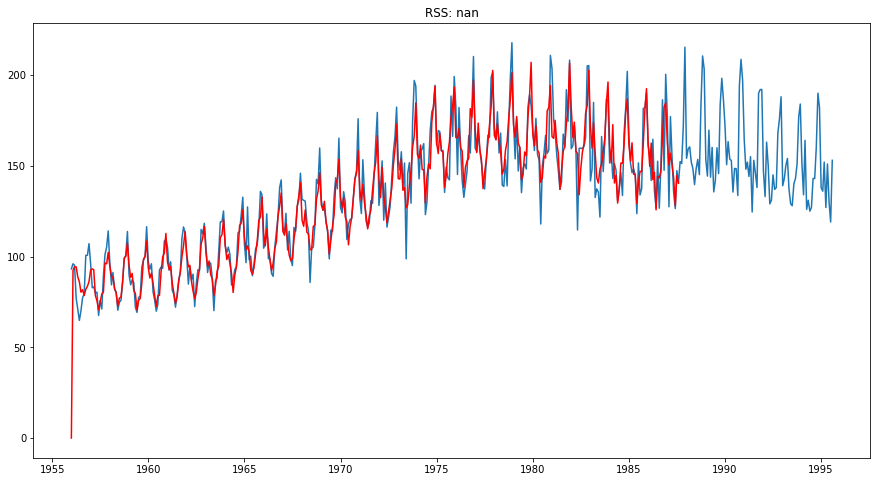

In [46]:
sarimax=sm.tsa.statespace.SARIMAX(y_train,order=(2,0,2),seasonal_order=(2,0,2,12))
result_sar=sarimax.fit()
plt.plot(df['Monthly_beer_production'])
plt.plot(result_sar.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_sar.fittedvalues - df['Monthly_beer_production'])))
print('Plotting SARIMAX Model')

<AxesSubplot:xlabel='Month'>

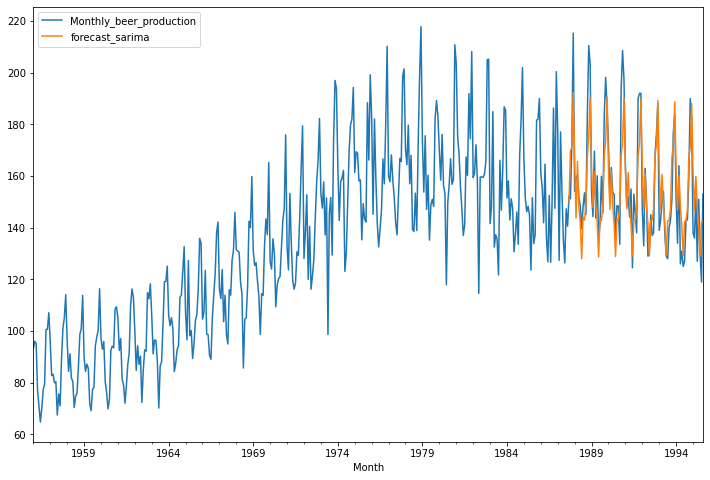

In [47]:
df['forecast_sarima']=result_sar.predict(start=380,end=476,dynamic=True)
df[['Monthly_beer_production','forecast_sarima']].plot(figsize=(12,8))

In [48]:
y_pred_sa=df['forecast_sarima'][380:]

In [49]:
future_dataframe_monthly

,Monthly_beer_production,Beer_prod_difference,forecast_arima
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,-16.1,NaN
1956-05-01,70.9,-25.1,NaN
...,...,...,...
1997-04-01,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN


C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

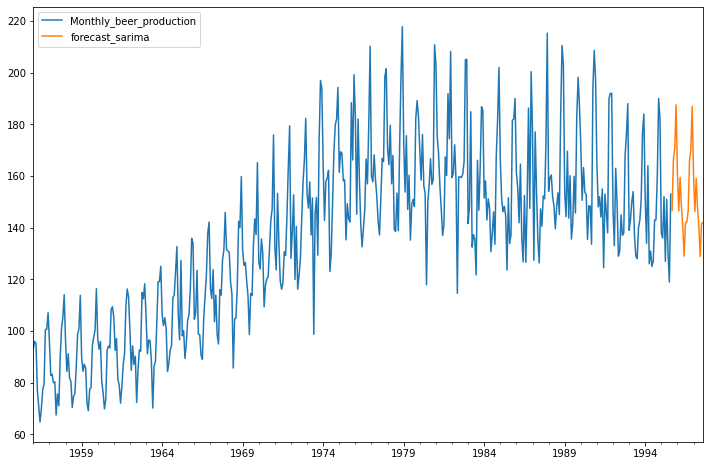

In [50]:
future_dataframe_monthly['forecast_sarima']=result_sar.predict(start=476,end=500,dynamic=True)
future_dataframe_monthly[['Monthly_beer_production','forecast_sarima']].plot(figsize=(12,8))

In [51]:
result_sar.forecast(12)

1987-09-01    149.662666
1987-10-01    169.814303
1987-11-01    170.991778
1987-12-01    192.383053
1988-01-01    166.207466
1988-02-01    143.785162
1988-03-01    165.617472
1988-04-01    148.338617
1988-05-01    141.632907
1988-06-01    127.995024
1988-07-01    144.086854
1988-08-01    142.982070
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
mean_absolute_percentage_error(y_test,y_pred_sa)

6.137746085073323

In [66]:
future_dataframe_monthly.tail(30)

,Monthly_beer_production,Beer_prod_difference,forecast_arima,forecast_sarima
1995-03-01,152.0,-30.0,NaN,NaN
1995-04-01,127.0,-11.0,NaN,NaN
1995-05-01,151.0,15.0,NaN,NaN
1995-06-01,130.0,-22.0,NaN,NaN
1995-07-01,119.0,-8.0,NaN,NaN
1995-08-01,153.0,2.0,NaN,NaN
1995-09-01,NaN,NaN,150.883377,139.033097
1995-10-01,NaN,NaN,148.472088,162.881438
1995-11-01,NaN,NaN,147.440224,180.517710
1995-12-01,NaN,NaN,146.985938,183.603060
